## Radiocarbon age models and linear regressions

In [1]:
# Load packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'

In [2]:
# Import the radicoarbon data
df = pd.read_csv('~/Documents/GitHub/data/schiff radiocarbon 02-05-2019.csv')
stetson = df[df['Coral'] == 'stet-4904-bc1-d5']
jack4684 = df[df['Coral'] == 'jack-4684-bc1']
stetson_old = df[df['Coral'] == 'stet-4904-bc1']
sav = df[df['Coral'] == 'sav-4902-bc1']
jack4907 = df[df['Coral'] == 'jack-4907-bc1-d1']

df

Coral     ID 1                                            ID 2  \
0   jack-4907-bc1-d1      NaN   Jacksonville Deep Water Coral 1105LEJK4907_17   
1   jack-4907-bc1-d1      NaN   Jacksonville Deep Water Coral 1105LEJK4907_18   
2   jack-4907-bc1-d1      NaN    Jacksonville Deep Water Coral 1105LEJK4907_1   
..               ...      ...                                             ...   
87  stet-4904-bc1-d5  N105020                                       STET 7.94   
88  stet-4904-bc1-d5  N105021                                      STET 7.123   
89  stet-4904-bc1-d5  N105022                                      STET 7.149   

   Sample  Distance microns  Fraction modern     error   D14C  D14C.1  d13C  \
0       2                95             0.88  0.004100 -118.7  -124.6 -14.8   
1       7               236             0.86  0.003200 -138.1  -143.9 -15.2   
2      11               512             0.80  0.002800 -203.5  -208.9 -15.0   
..    ...               ...              ...       ...    ...     ...   ...   
87   7.94             10011             0.81  0.002831 -193.3     NaN -15.0   
88  7.123             10533             0.84  0.002960 -155.9     NaN -15.0   
89  7.149             11001             0.84  0.002954 -157.9     NaN -15.0   

    14C Age  error.1  Year analyzed  
0    1010.0     35.0           2006  
1    1190.0     30.0           2006  
2    1830.0     30.0           2006  
..      ...      ...            ...  
87   1725.0     30.0           2013  
88   1360.0     30.0           2013  
89   1380.0     30.0           2013  

[90 rows x 13 columns]

### Bomb spike figures.

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4))
ax1.plot('Distance microns', 'D14C', data=stetson_old, label = "Stetson-4904 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax2.plot('Distance microns', 'D14C', data=stetson, label = "Stetson-4904 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax3.plot('Distance microns', 'D14C', data=jack4684, label = "Jacksonville-4684 BC1", marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1)

ax1.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]")
ax1.set_xlabel('Distance from edge (microns)')
ax2.set_xlabel('Distance from edge (microns)')
ax3.set_xlabel('Distance from edge (microns)')

ax1.tick_params(direction='in')
ax2.tick_params(direction='in')
ax3.tick_params(direction='in')

ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)
ax3.legend(frameon=False, loc = 0)

plt.savefig('fig_d14c_results_recent.png', dpi = 300, bbox_inches = 'tight')

In [5]:
df.Coral.unique()

array(['jack-4907-bc1-d1', 'stet-4904-bc1', 'sav-4902-bc1',
       'jack-4684-bc1', 'stet-4904-bc1-d5'], dtype=object)

### Ancient D14C figures

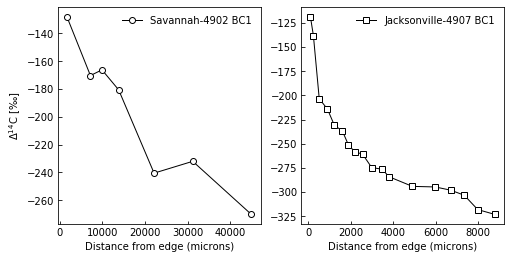

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4))
ax1.plot('Distance microns', 'D14C', data=sav, label = "Savannah-4902 BC1",marker = "o", color = 'k', markerfacecolor = "white", linewidth = 1)
ax2.plot('Distance microns', 'D14C', data=jack4907, label = "Jacksonville-4907 BC1",marker = "s", color = 'k', markerfacecolor = "white", linewidth = 1)

ax1.set_ylabel(r'$\mathrm{\Delta}^{14}$C ['u"\u2030]")
ax1.set_xlabel('Distance from edge (microns)')
ax2.set_xlabel('Distance from edge (microns)')

ax1.tick_params(direction='in')
ax2.tick_params(direction='in')

ax1.legend(frameon=False, loc = 0)
ax2.legend(frameon=False, loc = 0)

plt.savefig('fig_d14c_results_ancient.png', dpi = 300, bbox_inches = 'tight')